In [8]:
%matplotlib inline
import numpy as np
from scipy.integrate import solve_ivp

import matplotlib.pyplot as plt
from IPython.display import Image

In [11]:
class GravitationalOrbits():
    def __init__(self, m_1=1.,m_2=1., G=1.
                ):

        self.G = G
        self.m_1 = m_1
        self.m_2 = m_2
    def dz_dt(self,t,z):
        """
        [dz/dt d^2z/dt^2]
        
        Parameters
        -------
        t : time
        z: 8- component vector with
                z[0] = x_1(t) and z[1] = x_dot_1(t)
                z[2] = y_1(t) and z[3] = y_dot_1(t)
                z[4] = x_2(t) and z[5] = x_dot_2(t)
                z[6] = y_2(t) and z[7] = y_dot_2(t)
        
        return [volocity, acceleration]
        
        """
        #distance between two object
        r_12 = np.sqrt( (z[0] - z[4])**2 + (z[2] - z[6])**2)
        return[\
              z[1], self.G * self.m_2 * (z[4]-z[0])/r_12**3, \
              z[3], self.G * self.m_2 * (z[6]-z[2])/r_12**3, \
              z[5], -self.G * self.m_1 * (z[4]-z[0])/r_12**3, \
              z[7], -self.G * self.m_1 * (z[6]-z[2])/r_12**3, \
              ]
    def solve_ode(self,t_pts, z_0, abserr=1.0e-8, relerr=1.0e-8):
        solution = solve_ivp(self.dz_dt, (t_pts[0], t_pts[-1]),\
                            z_0,t_eval=t_pts, method='RK23',
                            atol=abserr, rtol=relerr)
        x_1, x_dot_1, y_1, y_dot_1, x_2, x_dot_2, y_2, y_dot_2 = solution.y
        return x_1, x_dot_1, y_1, y_dot_1, x_2, x_dot_2, y_2, y_dot_2
    def solve_ode_Leapfrog(self, t_pts, z_0):
        pass

In [3]:
def plot_y_vs_x(x, y, axis_labels=None, label=None, title=None, 
                color=None, linestyle=None, semilogy=False, loglog=False,
                ax=None):
    """
    Generic plotting function: return a figure axis with a plot of y vs. x,
    with line color and style, title, axis labels, and line label
    """
    if ax is None:        # if the axis object doesn't exist, make one
        ax = plt.gca()

    if (semilogy):
        line, = ax.semilogy(x, y, label=label, 
                            color=color, linestyle=linestyle)
    elif (loglog):
        line, = ax.loglog(x, y, label=label, 
                          color=color, linestyle=linestyle)
    else:
        line, = ax.plot(x, y, label=label, 
                    color=color, linestyle=linestyle)

    if label is not None:    # if a label if passed, show the legend
        ax.legend()
    if title is not None:    # set a title if one if passed
        ax.set_title(title)
    if axis_labels is not None:  # set x-axis and y-axis labels if passed  
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])

    return ax, line

In [4]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

In [30]:
orbit_labels = (r'$x$', r'$y$')

t_start = 0.
t_end = 10.
delta_t = 0.01

t_pts = np.arange(t_start,t_end+delta_t, delta_t)


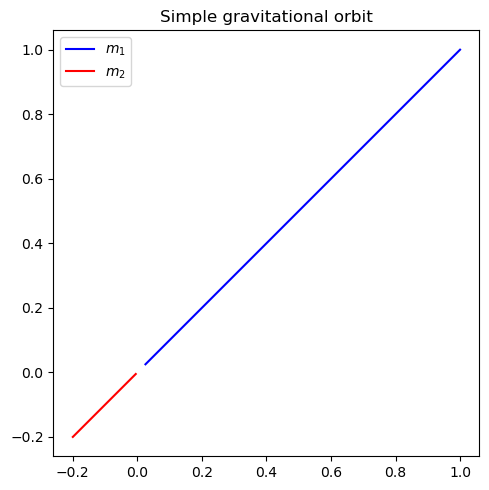

In [23]:
G = 1.
m_1 = 1.
m_2 = 5.

ol = GravitationalOrbits(m_1,m_2,G)
# case for com velocity is zero
x_1_0, x_dot_1_0 = 1. , -1.
y_1_0, y_dot_1_0 = 1. , -1.
x_2_0, x_dot_2_0 = -(m_1 / m_2) * x_1_0, -(m_1/m_2) * x_dot_1_0
y_2_0, y_dot_2_0 = -(m_1 / m_2) * y_1_0, -(m_1/m_2) * y_dot_1_0

z_0 = [x_1_0, x_dot_1_0, y_1_0, y_dot_1_0, \
      x_2_0, x_dot_2_0, y_2_0, y_dot_2_0,]
x_1, x_dot_1, y_1, y_dot_1, x_2 ,x_dot_2, y_2,y_dot_2 = ol.solve_ode(t_pts,z_0)


fig = plt.figure(figsize=(5,5))

ax = fig.add_subplot(1,1,1)

start, stop = start_stop_indices(t_pts,t_start,t_end)
ax.plot(x_1,y_1,color='blue', label = r'$m_1$')
ax.plot(x_2,y_2,color='red', label = r'$m_2$')
ax.set_title('Simple gravitational orbit')
ax.legend()
ax.set_aspect(1)

fig.tight_layout()


In [24]:
x_1

array([1.        , 0.98993821, 0.97975113, 0.96943616, 0.95899055,
       0.94841145, 0.93769586, 0.92684063, 0.91584249, 0.90469797,
       0.89340345, 0.8819551 , 0.87034892, 0.85858066, 0.84664584,
       0.83453974, 0.82225735, 0.80979335, 0.79714213, 0.78429768,
       0.77125362, 0.75800314, 0.74453896, 0.73085328, 0.71693772,
       0.70278326, 0.68838018, 0.67371797, 0.6587852 , 0.64356949,
       0.62805727, 0.61223371, 0.59608249, 0.57958562, 0.5627231 ,
       0.54547268, 0.52780941, 0.50970516, 0.491128  , 0.47204144,
       0.45240336, 0.43216477, 0.41126796, 0.38964417, 0.36721022,
       0.34386371, 0.31947595, 0.29388096, 0.26685766, 0.23809913,
       0.20715458, 0.17330691, 0.13526424, 0.090108  , 0.02508576])

In [25]:
y_1

array([1.        , 0.98993821, 0.97975113, 0.96943616, 0.95899055,
       0.94841145, 0.93769586, 0.92684063, 0.91584249, 0.90469797,
       0.89340345, 0.8819551 , 0.87034892, 0.85858066, 0.84664584,
       0.83453974, 0.82225735, 0.80979335, 0.79714213, 0.78429768,
       0.77125362, 0.75800314, 0.74453896, 0.73085328, 0.71693772,
       0.70278326, 0.68838018, 0.67371797, 0.6587852 , 0.64356949,
       0.62805727, 0.61223371, 0.59608249, 0.57958562, 0.5627231 ,
       0.54547268, 0.52780941, 0.50970516, 0.491128  , 0.47204144,
       0.45240336, 0.43216477, 0.41126796, 0.38964417, 0.36721022,
       0.34386371, 0.31947595, 0.29388096, 0.26685766, 0.23809913,
       0.20715458, 0.17330691, 0.13526424, 0.090108  , 0.02508576])

In [27]:
x_2

array([-0.2       , -0.19798764, -0.19595023, -0.19388723, -0.19179811,
       -0.18968229, -0.18753917, -0.18536813, -0.1831685 , -0.18093959,
       -0.17868069, -0.17639102, -0.17406978, -0.17171613, -0.16932917,
       -0.16690795, -0.16445147, -0.16195867, -0.15942843, -0.15685954,
       -0.15425072, -0.15160063, -0.14890779, -0.14617066, -0.14338754,
       -0.14055665, -0.13767604, -0.13474359, -0.13175704, -0.1287139 ,
       -0.12561145, -0.12244674, -0.1192165 , -0.11591712, -0.11254462,
       -0.10909454, -0.10556188, -0.10194103, -0.0982256 , -0.09440829,
       -0.09048067, -0.08643295, -0.08225359, -0.07792883, -0.07344204,
       -0.06877274, -0.06389519, -0.05877619, -0.05337153, -0.04761983,
       -0.04143092, -0.03466138, -0.02705285, -0.0180216 , -0.00501715])

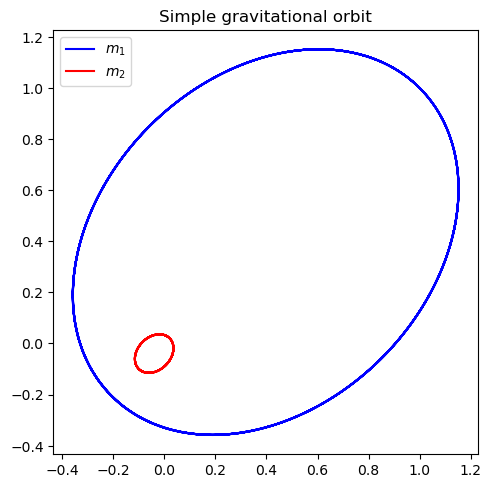

In [32]:
G = 1.
m_1 = 1.
m_2 = 10.

ol = GravitationalOrbits(m_1,m_2,G)
# case for com velocity is zero
x_1_0, x_dot_1_0 = 1. , -1.
y_1_0, y_dot_1_0 = 1. , 1.
x_2_0, x_dot_2_0 = -(m_1 / m_2) * x_1_0, -(m_1/m_2) * x_dot_1_0
y_2_0, y_dot_2_0 = -(m_1 / m_2) * y_1_0, -(m_1/m_2) * y_dot_1_0

z_0 = [x_1_0, x_dot_1_0, y_1_0, y_dot_1_0, \
      x_2_0, x_dot_2_0, y_2_0, y_dot_2_0,]
x_1, x_dot_1, y_1, y_dot_1, x_2 ,x_dot_2, y_2,y_dot_2 = ol.solve_ode(t_pts,z_0)


fig = plt.figure(figsize=(5,5))

ax = fig.add_subplot(1,1,1)

start, stop = start_stop_indices(t_pts,t_start,t_end)
ax.plot(x_1,y_1,color='blue', label = r'$m_1$')
ax.plot(x_2,y_2,color='red', label = r'$m_2$')
ax.set_title('Simple gravitational orbit')
ax.legend()
ax.set_aspect(1)

fig.tight_layout()

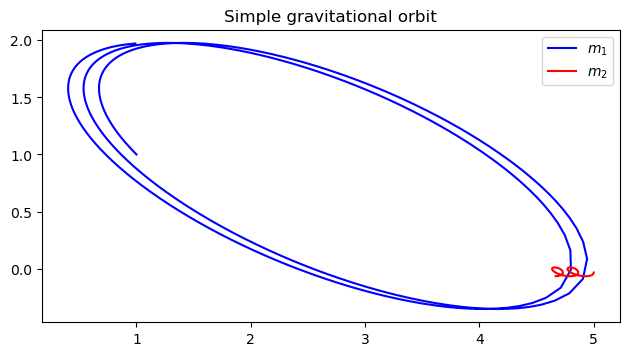

In [37]:
G = 1.
m_1 = 1.
m_2 = 30.

ol = GravitationalOrbits(m_1,m_2,G)
# case for com velocity is zero
x_1_0, x_dot_1_0 = 1. , -1.
y_1_0, y_dot_1_0 = 1. , 1.
#x_2_0, x_dot_2_0 = -(m_1 / m_2) * x_1_0, -(m_1/m_2) * x_dot_1_0
x_2_0, x_dot_2_0 = 5, 0
y_2_0, y_dot_2_0 = -(m_1 / m_2) * y_1_0, -(m_1/m_2) * y_dot_1_0

z_0 = [x_1_0, x_dot_1_0, y_1_0, y_dot_1_0, \
      x_2_0, x_dot_2_0, y_2_0, y_dot_2_0,]
x_1, x_dot_1, y_1, y_dot_1, x_2 ,x_dot_2, y_2,y_dot_2 = ol.solve_ode(t_pts,z_0)


#fig = plt.figure(figsize=(5,5))
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

start, stop = start_stop_indices(t_pts,t_start,t_end)
ax.plot(x_1,y_1,color='blue', label = r'$m_1$')
ax.plot(x_2,y_2,color='red', label = r'$m_2$')
ax.set_title('Simple gravitational orbit')
ax.legend()
ax.set_aspect(1)

fig.tight_layout()